In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
_data = pd.read_csv('income.csv', na_values=[' ?'])
data = _data.copy()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [20]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [9]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [12]:
data.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [13]:
data["JobType"].value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [14]:
data['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [21]:
data[data.isnull().any(axis=1)]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [22]:
data = data.dropna(axis=0)

In [24]:
data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [27]:
pd.crosstab(index=data['gender'], columns='count', normalize=True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [40]:
pd.crosstab(index=data['gender'], columns=data['SalStat'], margins=True, normalize="index")

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


<Axes: xlabel='count', ylabel='SalStat'>

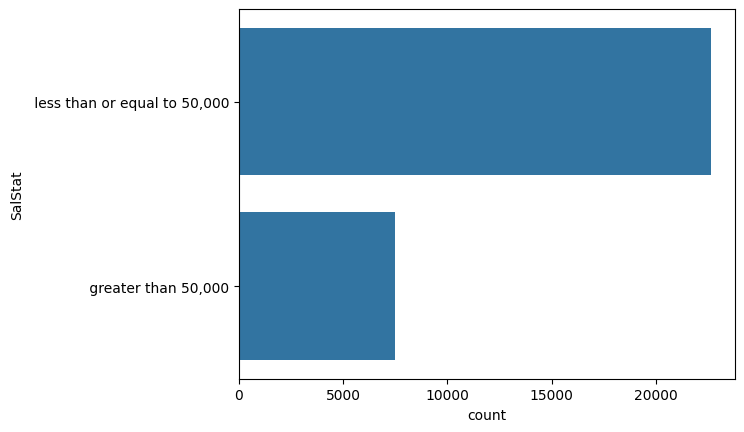

In [41]:
sns.countplot(data['SalStat'])

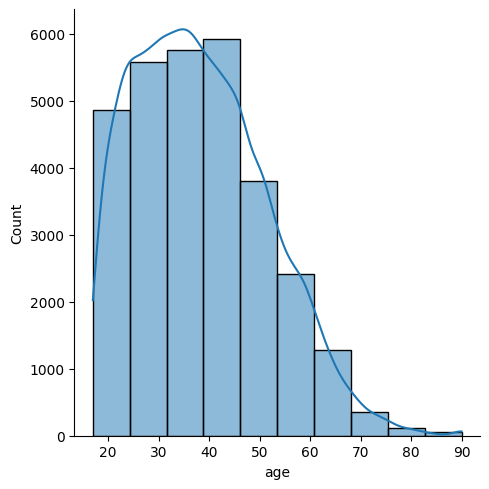

In [44]:
sns.displot(data['age'], bins=10, kde=True)

<Axes: xlabel='SalStat', ylabel='age'>

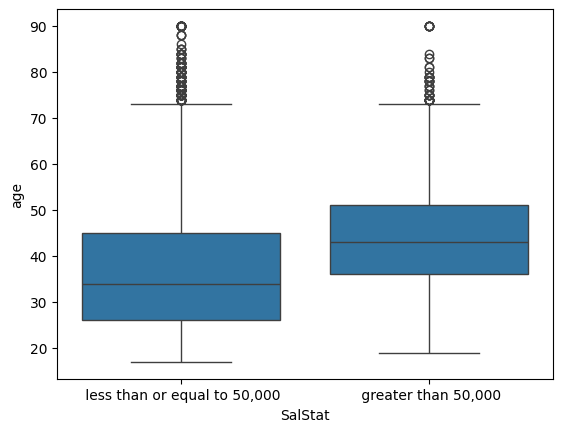

In [52]:
sns.boxplot(data, x='SalStat', y='age')

In [55]:
data.groupby('SalStat')['age'].median()

SalStat
greater than 50,000             43.0
less than or equal to 50,000    34.0
Name: age, dtype: float64

In [58]:
data['SalStat'] = data['SalStat'].map({" less than or equal to 50,000":0, " greater than 50,000": 1})

In [60]:
new_data = pd.get_dummies(data, drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [62]:
columns = new_data.columns
columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat',
       'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc',
       'JobType_ Self-emp-not-inc', 'JobType_ State-gov',
       'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th',
       'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th',
       'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors',
       'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters',
       'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation

In [63]:
features = list(set(columns) - set(['SalStat']))
features

['nativecountry_ Laos',
 'EdType_ Assoc-voc',
 'relationship_ Own-child',
 'maritalstatus_ Never-married',
 'nativecountry_ Portugal',
 'occupation_ Other-service',
 'nativecountry_ Guatemala',
 'race_ Black',
 'occupation_ Sales',
 'relationship_ Wife',
 'nativecountry_ Taiwan',
 'capitalloss',
 'nativecountry_ Trinadad&Tobago',
 'occupation_ Handlers-cleaners',
 'occupation_ Exec-managerial',
 'EdType_ Some-college',
 'EdType_ 1st-4th',
 'EdType_ 9th',
 'nativecountry_ Japan',
 'nativecountry_ Greece',
 'JobType_ State-gov',
 'EdType_ Masters',
 'occupation_ Machine-op-inspct',
 'nativecountry_ Peru',
 'JobType_ Self-emp-inc',
 'nativecountry_ Iran',
 'occupation_ Craft-repair',
 'occupation_ Farming-fishing',
 'occupation_ Tech-support',
 'nativecountry_ Jamaica',
 'occupation_ Armed-Forces',
 'nativecountry_ Holand-Netherlands',
 'nativecountry_ Poland',
 'nativecountry_ Hong',
 'relationship_ Not-in-family',
 'nativecountry_ Ecuador',
 'nativecountry_ Vietnam',
 'maritalstatus_ Ma

In [66]:
y=new_data['SalStat'].values
x=new_data[features].values

In [77]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

In [67]:
logi = LogisticRegression()


In [71]:
logi.fit(train_x, train_y)

C:\Users\kgavu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
logi.coef_

array([[-6.15948901e-03, -3.85725781e-02, -9.37703725e-01,
        -1.33974004e+00, -1.37508023e-02, -7.38858639e-01,
        -2.17426929e-02, -4.32885286e-01,  9.88039796e-02,
         2.45844170e-01,  1.91625954e-03,  6.67413798e-04,
        -4.48655869e-03, -3.38675220e-01,  8.95969768e-01,
        -3.93873636e-01, -7.17122884e-02, -1.72430540e-01,
        -4.93159614e-04, -8.35368738e-03, -1.27119743e-01,
         5.26014773e-01, -3.50178548e-01, -1.20774866e-02,
         1.60796084e-01, -2.73116063e-03, -3.21516246e-01,
        -3.90516549e-01,  1.17297400e-01, -1.19515494e-02,
        -1.94075894e-03, -8.89829926e-04, -9.36021902e-03,
        -1.27760485e-03, -4.94514811e-01, -7.24450747e-03,
        -3.37123874e-02,  1.12514011e+00,  6.82438562e-01,
        -1.28868488e-02, -5.82402586e-02, -2.57647653e-01,
        -4.21830855e-01, -8.21234411e-03,  7.20498376e-01,
        -2.01998457e-02,  1.45244918e-02, -3.04086139e-01,
        -1.01273055e-04, -2.24438355e-03, -3.34830342e-0

In [73]:
logi.intercept_

array([-1.03826701])

In [82]:
prediction = logi.predict(test_x)

In [83]:
confusion = confusion_matrix(test_y, prediction)
confusion

array([[6296,  527],
       [ 957, 1269]], dtype=int64)

In [84]:
acc = accuracy_score(test_y, prediction)
acc

0.8360039783401481

In [85]:
(test_y != prediction).sum()

1484

In [119]:
cols=['gender', 'nativecountry', 'race', 'JobType']
new_data = data.drop(cols, axis=1)
new_data = pd.get_dummies(new_data, drop_first=True)

In [120]:
columns = new_data.columns

In [121]:
features=list(set(columns)-set(["SalStat"]))
features

['EdType_ Assoc-voc',
 'occupation_ Prof-specialty',
 'EdType_ Bachelors',
 'relationship_ Own-child',
 'maritalstatus_ Never-married',
 'EdType_ 11th',
 'occupation_ Other-service',
 'age',
 'EdType_ 12th',
 'relationship_ Other-relative',
 'occupation_ Sales',
 'relationship_ Wife',
 'capitalgain',
 'EdType_ Assoc-acdm',
 'capitalloss',
 'maritalstatus_ Widowed',
 'occupation_ Handlers-cleaners',
 'occupation_ Exec-managerial',
 'EdType_ Some-college',
 'EdType_ 1st-4th',
 'EdType_ 9th',
 'EdType_ Preschool',
 'occupation_ Protective-serv',
 'maritalstatus_ Separated',
 'EdType_ Masters',
 'occupation_ Machine-op-inspct',
 'occupation_ Priv-house-serv',
 'EdType_ Doctorate',
 'occupation_ Craft-repair',
 'occupation_ Farming-fishing',
 'occupation_ Tech-support',
 'relationship_ Unmarried',
 'occupation_ Transport-moving',
 'EdType_ 5th-6th',
 'hoursperweek',
 'occupation_ Armed-Forces',
 'EdType_ HS-grad',
 'EdType_ 7th-8th',
 'relationship_ Not-in-family',
 'maritalstatus_ Married-

In [122]:
y = new_data["SalStat"].values
x = new_data[features].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [123]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3, random_state=False)
logi = LogisticRegression()
logi.fit(trainX, trainY)

C:\Users\kgavu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
pred = logi.predict(testX)
acc = accuracy_score(testY, pred)
acc

0.8361144877887059

In [129]:
from sklearn.neighbors import KNeighborsClassifier as kn
import matplotlib.pyplot as plt

In [130]:
knCls = kn(n_neighbors=5)

In [131]:
knCls.fit(trainX, trainY)

KNeighborsClassifier()

In [132]:
pred = knCls.predict(testX)

In [135]:
confu = confusion_matrix(testY, pred)
confu

array([[6187,  636],
       [ 862, 1364]], dtype=int64)

In [137]:
acc = accuracy_score(testY, pred)
acc

0.8344568460603382

In [138]:
for i in range(1, 20):
    knn = kn(n_neighbors=i)
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    print(accuracy_score(pred_i, testY) * 100)

80.95922201348216
83.29097137805283
82.93734114266769
83.76616200685159
83.44568460603382
84.05348657310199
83.76616200685159
83.9098242899768
83.82141673113051
84.19714885622722
83.68880539286108
83.9098242899768
83.898773345121
83.96507901425572
83.92087523483258
84.06453751795779
84.1308431870925
84.25240358050613
84.04243562824621
